Z observé = 3.5355339059327378
Sigma moyenne = 14.14213562373095
Z critique = 2.3263478740408408
On rejette H0 : la technique nouvelle augmente la charge de rupture.


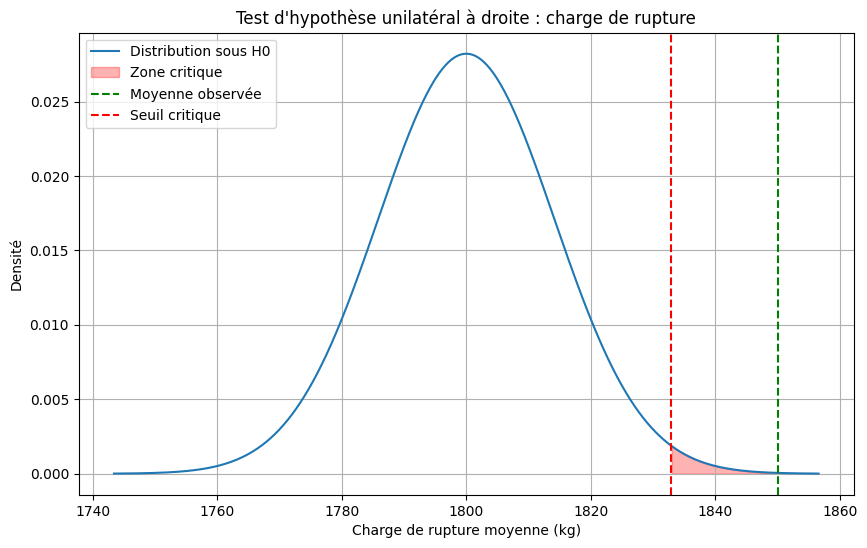

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# H0 mu <= 1800
# H1 mu > 1800

mu = 1800
sigma = 100
n = 50
moyenne_observee = 1850
alpha = 0.01 

sigma_moyenne = sigma / math.sqrt(n)

Z = (moyenne_observee - mu) / sigma_moyenne
Z_crit = norm.ppf(1 - alpha)  # car unilatéral à droite

print("Z observé =", Z)
print("Sigma moyenne =", sigma_moyenne)
print("Z critique =", Z_crit)

if Z >= Z_crit:
    print("On rejette H0 : la technique nouvelle augmente la charge de rupture.")
else:
    print("On ne rejette pas H0 : aucune preuve que la technique augmente la charge.")

x = np.linspace(mu - 4*sigma_moyenne, mu + 4*sigma_moyenne, 1000)
y = norm.pdf(x, mu, sigma_moyenne)

plt.figure(figsize=(10,6))
plt.plot(x, y, label="Distribution sous H0")
plt.fill_between(x, 0, y, where=(x >= mu + Z_crit*sigma_moyenne), color='red', alpha=0.3, label="Zone critique")
plt.axvline(moyenne_observee, color='green', linestyle='--', label="Moyenne observée")
plt.axvline(mu + Z_crit*sigma_moyenne, color='red', linestyle='--', label="Seuil critique")
plt.title("Test d'hypothèse unilatéral à droite : charge de rupture")
plt.xlabel("Charge de rupture moyenne (kg)")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()